<a href="https://colab.research.google.com/github/theakash07/Machine_learning/blob/main/Survival_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt


1. Accuracy is a measure of the overall correctness of your model's
   predictions.
  
  
   
       Accuracy= Number of Correct Predictions/Total Number of Predictions.


2. Precision is a measure that tells you how well your model is performing when it predicts a positive (e.g., class 1) outcome
        
        Precision= True Positives / False Positives + True Positives

3.Recall is a measure of how many of the actual positive instances were correctly predicted as positive by the model.
        
        Recall= True Positives / False Negatives+True Positives

4. The **F1-score** is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall, helping to evaluate a model's overall performance. The formula for the F1-score is:

      
      F1-Score= 2⋅Precision⋅Recall / Precision+Recall

5.**Confusion Matrix (confusion_matrix)**: A confusion matrix is a table
  that allows you to visualize the performance of a classification model. It shows the count of true positive, true negative, false positive, and false negative predictions. This matrix can help you understand where the model is making errors and which classes are being confused with each other.


In [67]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COllab data files/train.csv') #imported the train data from drive
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COllab data files/train.csv') #imported the unseen data which will be used for the testing of the mode


In [69]:
df = pd.concat([train, test])


In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.shape

(1782, 12)

In [72]:
df.isnull().sum() #found all the null values of train data set

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [73]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [74]:
df.isnull().sum() #found all the null values of train data set

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [75]:
df.describe() #describing all the values of

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.281582,0.486456,0.835836,13.016041,1.102434,0.805831,49.679476
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
nc = df.select_dtypes(include=['int64', 'float64'])

# Select categorical columns
cc = df.select_dtypes(exclude=['int64', 'float64'])

In [79]:
print("Numerical data:")
print(nc)
print("\nCategorical data:")
print(cc)

Numerical data:
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3  28.0      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[1782 rows x 7 columns]

Categorical data:
                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florenc

In [80]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1782 non-null   object
 1   Sex       1782 non-null   object
 2   Ticket    1782 non-null   object
 3   Cabin     408 non-null    object
 4   Embarked  1778 non-null   object
dtypes: object(5)
memory usage: 83.5+ KB


In [81]:
cc = cc.drop(['Name'], axis =1)

In [82]:
cc.head(5)

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


In [83]:
# Assuming df is your dataframe and 'Sex' is your column
cc['Sex'] = cc['Sex'].map({'male': 0, 'female': 1})

In [84]:
cc.head(5)

,Sex,Ticket,Cabin,Embarked
0,0,A/5 21171,NaN,S
1,1,PC 17599,C85,C
2,1,STON/O2. 3101282,NaN,S
3,1,113803,C123,S
4,0,373450,NaN,S


In [85]:
cc['Ticket'].isnull().sum()

0

In [86]:
cc['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [87]:
# Assuming df is your dataframe and 'Embarked' is your column
mode_value = cc['Embarked'].mode()[0]
cc['Embarked'] = cc['Embarked'].fillna(mode_value)

In [88]:
cc.isnull().sum()

Sex            0
Ticket         0
Cabin       1374
Embarked       0
dtype: int64

In [89]:
cc = cc.drop(['Cabin'], axis =1)

In [90]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1782 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       1782 non-null   int64 
 1   Ticket    1782 non-null   object
 2   Embarked  1782 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.7+ KB


In [91]:
cc.head()

,Sex,Ticket,Embarked
0,0,A/5 21171,S
1,1,PC 17599,C
2,1,STON/O2. 3101282,S
3,1,113803,S
4,0,373450,S


In [92]:
cc['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [93]:
cc = cc.drop(['Ticket'], axis =1)

In [94]:
cc['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [95]:
# Assuming df is your dataframe and 'Sex' is your column
cc['Embarked'] = cc['Embarked'].map({'S': 0, 'C': 1,'Q':2})

In [96]:
cc.head()

,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0


In [97]:
df = pd.concat([nc, cc])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3564 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   float64
 1   Survived     1782 non-null   float64
 2   Pclass       1782 non-null   float64
 3   Age          1782 non-null   float64
 4   SibSp        1782 non-null   float64
 5   Parch        1782 non-null   float64
 6   Fare         1782 non-null   float64
 7   Sex          1782 non-null   float64
 8   Embarked     1782 non-null   float64
dtypes: float64(9)
memory usage: 278.4 KB


In [99]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,NaN,NaN
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,NaN,NaN
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,NaN,NaN
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,NaN,NaN
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,NaN,NaN


In [100]:
import seaborn as sns

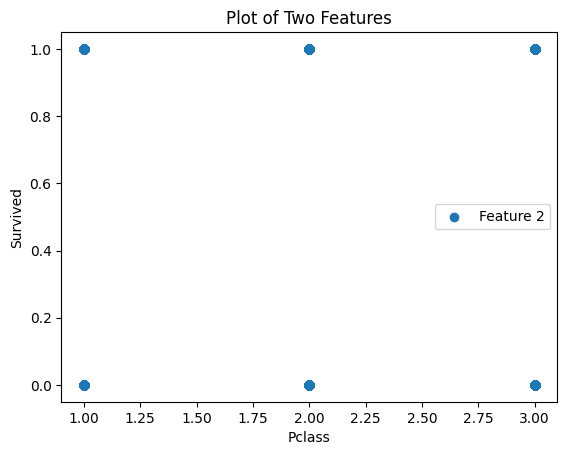

In [101]:
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Plot of Two Features")
plt.scatter( df['Pclass'],df['Survived'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

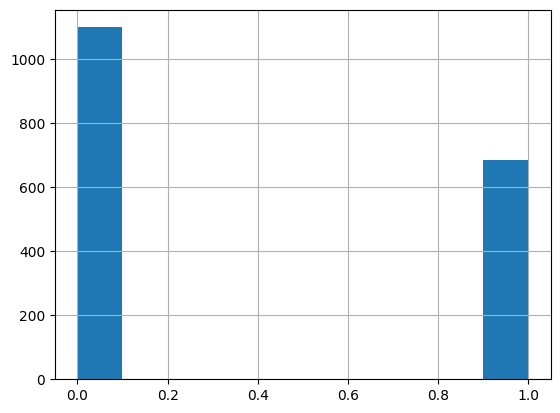

In [103]:
df['Survived'].hist()
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

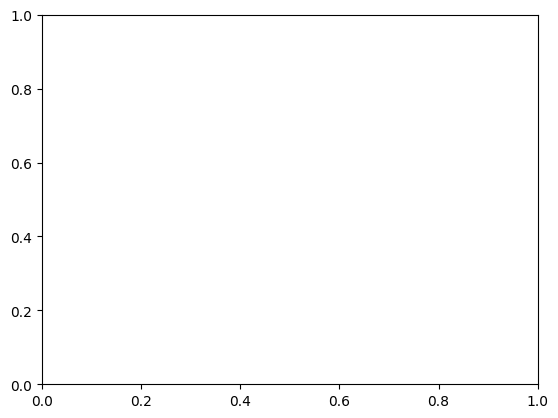

In [105]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()


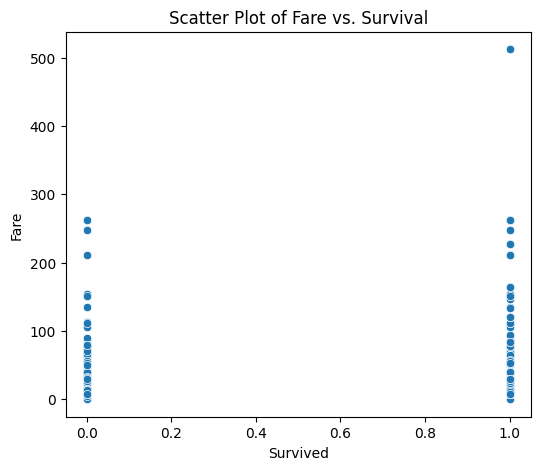

In [ ]:
# Set a smaller figure size
plt.figure(figsize=(6, 5))

# Create a scatter plot without using 'Survival' as a hue
sns.scatterplot(data=train4, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs. Survival')
plt.show()


In [ ]:
train4['Embarked'].info()

<class 'pandas.core.series.Series'>
Int64Index: 712 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
712 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [ ]:
train5 = train4.drop(columns=['Name', 'Embarked'])
train5.shape

(712, 6)

In [ ]:
#now i'm dropping the columns which i have dropped in from  the train data
test1=test.drop(columns=['Name','Embarked','Cabin','Ticket','Parch','SibSp'])
test1.shape

test1['Sex'] = test1['Sex'].replace({'male': 0, 'female': 1})

In [ ]:
test1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

In [ ]:
test2=test1.dropna(subset='Age')

In [ ]:
test2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [ ]:
test2.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500


In [ ]:
train5.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500


Now done with data preprocessing so from ownwards processding to model trianing usign logisitic regression

In [ ]:
#Train the Logistic Regression Model:

X_train = train5.drop(columns='Survived')  # Features, droppin target column
y_train = train5['Survived']  # Target variable this is our target variable

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Make Predictions on Test Data:

X_test = test2.drop(columns='Survived')  # Features for test data
y_test = test2['Survived']  # True labels for test data

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7941176470588235
F1 Score: 0.7398230088495575
Precision: 0.76
Recall: 0.7206896551724138


In [ ]:
submission_df = pd.DataFrame({'PassengerId': test2['PassengerId'], 'Survived': y_pred})
submission_df.to_csv('submission.csv', index=False)
